In [109]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from tqdm import tqdm

In [110]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

x = torch.tensor(x).unsqueeze(dim=1).float()
y = torch.tensor(y).unsqueeze(dim=1).float()

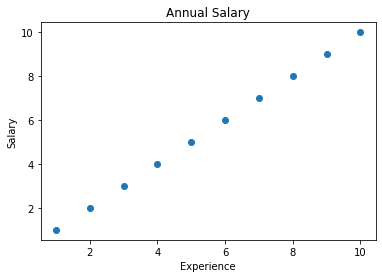

In [111]:
plt.title('Annual Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y)
plt.show()

In [112]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
print(model(x))

tensor([[-0.4567],
        [-0.2023],
        [ 0.0521],
        [ 0.3066],
        [ 0.5610],
        [ 0.8154],
        [ 1.0698],
        [ 1.3242],
        [ 1.5786],
        [ 1.8330]], grad_fn=<AddmmBackward>)


In [125]:
for step in tqdm(range(10000)):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3886.43it/s]


In [126]:
test_x = [1+i*0.01 for i in range(900)]
test_x = torch.tensor(test_x).unsqueeze(dim=1).float()
test_y = model(test_x).detach()

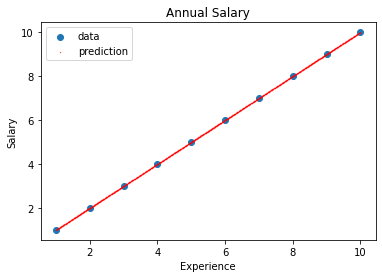

In [132]:
plt.title('Annual Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y)
plt.scatter(test_x, test_y, s=0.1, c='r')
plt.legend(('data', 'prediction'))
plt.show()